<a href="https://colab.research.google.com/github/ParthKhairnar101/ARIMA-Tourism-Trends/blob/main/ARIMA_Tourism_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from chart_studio import plotly
import cufflinks as cf
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import Dash, dcc, html, Output, Input
import math

from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
general = pd.read_csv("General Data 2014-2020.csv")
ct = pd.read_csv("Country Wise Yearly VIsitors.csv")
top10 = pd.read_csv("Top 10 Country FFA.csv")
top10states = pd.read_csv("Top 10 State Visit.csv")

In [ ]:
general.head()

,year,noftaii,noftaiiagr,noindfi,noindfiagr,nodtvasu,nodtvasuagr,feeftit,feeftitagr,feeftust,...,apfitr,apritragr,ipwiita,ipwirwta,ipwsiitr,ipwirwtr,ipaprita,ipaprirta,ipapritr,ipaprirtr
0,2014,7.68,10.2,18.33,10.3,1290.00,12.9,123320,14.5,20.240,...,377.0,4.7,0.68,41,1.62,15,2.91,12,5.37,8
1,2015,8.03,4.5,20.38,11.1,1432.00,11.6,135193,9.6,21.070,...,418.9,-0.3,0.68,40,1.71,14,2.88,11,5.03,7
2,2016,8.80,9.7,21.87,7.3,1613.60,12.7,154146,14.0,22.920,...,366.7,4.9,1.18,25,1.88,13,4.72,8,6.25,7
3,2017,10.04,14.0,23.94,9.5,1652.49,2.3,177874,15.4,27.310,...,389.5,5.0,1.17,26,2.05,13,4.81,7,7.01,7
4,2018,10.56,5.2,26.30,9.8,1854.90,11.9,194892,9.6,28.585,...,432.9,9.3,1.24,25,1.97,13,5.05,7,6.60,7


In [ ]:
ct.head()

,Country,2014,2015,2016,2017,2018,2019,2020
0,Canada,268485,281306,317239,335439,351040,351859,122868
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,Argentina,9731,9351,12308,14875,16345,12844,4294
3,Brazil,19563,20610,21289,24453,26579,25422,8092
4,Mexico,13978,14049,15689,18114,19909,20766,4580


In [ ]:
top10.head()

,year,top1_country,top1_ftas,top2_country,top2_ftas,top3_country,top3_ftas,top4_country,top4_ftas,top5_country,...,top6_country,top6_ftas,top7_country,top7_ftas,top8_country,top8_ftas,top9_country,top9_ftas,top10_country,top10_ftas
0,2014,United States,1118983,Bangladesh,942562,United Kingdom,838860,Sri Lanka,301601,Russian Fed.,...,Canada,268485,Malaysia,262026,France,246101,Australia,239762,Germany,239106
1,2015,United States,1213624,Bangladesh,1133879,United Kingdom,867601,Sri Lanka,299513,Canada,...,Malaysia,272941,Australia,263101,Germany,248314,France,230854,Japan,207415
2,2016,Bangladesh,1380409,United States,1296939,United Kingdom,941883,Canada,317239,Malaysia,...,Sri Lanka,297418,Australia,293625,Germany,265928,China,251313,France,238707
3,2017,Bangladesh,2156557,United States,1376919,United Kingdom,986296,Canada,335439,Australia,...,Malaysia,322126,Sri Lanka,303590,Russian Fed.,278904,Germany,269380,France,249620
4,2018,Bangladesh,2256675,United States,1456678,United Kingdom,1029758,Sri Lanka,353684,Canada,...,Australia,346486,Malaysia,319172,China,281768,Germany,274087,Russian Fed.,262309


In [ ]:
top10states.head()

,year,top1_state,top1_ftv,top2_state,top2_ftv,top3_state,top3_ftv,top4_state,top4_ftv,top5_state,...,top6_state,top6_ftv,top7_state,top7_ftv,top8_state,top8_ftv,top9_state,top9_ftv,top10_state,top10_ftv
0,2014.0,Tamil Nadu,327555233,Uttar Pradesh,182820108,Karnataka,118283220,Maharashtra,94127124,Andhra Pradesh,...,Telengana,72399113,Madhya Pradesh,63614525,West Bengal,49029590,Jharkhand,33427144,Rajasthan,33076491
1,2015.0,Tamil Nadu,333459047,Uttar Pradesh,204888457,Andhra Pradesh,121591054,Karnataka,119863942,Maharashtra,...,Telengana,94516316,Madhya Pradesh,77975738,West Bengal,70193450,Gujarat,36288463,Rajasthan,35187573
2,2016.0,Tamil Nadu,343812413,Uttar Pradesh,211707090,Andhra Pradesh,153163352,Madhya Pradesh,150490339,Karnataka,...,Maharashtra,116515801,Telengana,95160830,West Bengal,74460250,Gujarat,42252909,Rajasthan,41495115
3,2017.0,Tamil Nadu,385909376,Uttar Pradesh,233977619,Karnataka,179980191,Andhra Pradesh,165433898,Maharashtra,...,Telengana,85266596,West Bengal,79687645,Madhya Pradesh,78038522,Gujarat,48343121,Rajasthan,45916573
4,2018.0,Tamil Nadu,385909376,Uttar Pradesh,285079848,Karnataka,214306456,Andhra Pradesh,194767874,Maharashtra,...,Telengana,92878329,West Bengal,85657365,Madhya Pradesh,83969799,Gujarat,54369873,Rajasthan,50235643


# Exploratory Data Analysis

No. of tourists that visited India each year from 2014 to 2020

In [ ]:
#Plotting the graph with Plotly
px.bar(general, x="year", y="noftaii",
       labels={"year":"Year", "noftaii": "Tourists (in millions)"},
       title="Foreign tourists arriving in India.")

In [ ]:
#Reshaping the dataframe, so it is possible to use with Plotly
dfnew1 = pd.DataFrame(columns=["year", "country","visitors"])
# Create a list to store individual DataFrames before concatenation.
dfs_to_concat = []

for x in range(7):
    year = 2014 + x
    fourteen = top10[top10["year"] == year]
    visitors = [fourteen._get_value(0 + x, "top1_ftas"), fourteen._get_value(0 + x, "top2_ftas"),fourteen._get_value(0 + x, "top3_ftas"),fourteen._get_value(0 + x, "top4_ftas"),fourteen._get_value(0 + x, "top5_ftas"),fourteen._get_value(0 + x, "top6_ftas"),fourteen._get_value(0 + x, "top7_ftas"),fourteen._get_value(0 + x, "top8_ftas"),fourteen._get_value(0 + x, "top9_ftas"),fourteen._get_value(0 + x, "top10_ftas")]
    countries = [fourteen._get_value(0 + x, "top1_country"), fourteen._get_value(0 + x, "top2_country"),fourteen._get_value(0 + x, "top3_country"),fourteen._get_value(0 + x, "top4_country"),fourteen._get_value(0 + x, "top5_country"),fourteen._get_value(0 + x, "top6_country"),fourteen._get_value(0 + x, "top7_country"),fourteen._get_value(0 + x, "top8_country"),fourteen._get_value(0 + x, "top9_country"),fourteen._get_value(0 + x, "top10_country")]
    d1 = {"year": year, "country": countries, "visitors": visitors}
    df1 = pd.DataFrame(data=d1,columns=["year", "country","visitors"])
    # Append the current DataFrame to the list.
    dfs_to_concat.append(df1)

# Concatenate all DataFrames in the list outside the loop.
dfnew1 = pd.concat(dfs_to_concat, ignore_index=True)

In [ ]:
print(dfnew1)

    year         country  visitors
0   2014   United States   1118983
1   2014      Bangladesh    942562
2   2014  United Kingdom    838860
3   2014       Sri Lanka    301601
4   2014    Russian Fed.    269832
..   ...             ...       ...
65  2020       Australia     86758
66  2020          France     74243
67  2020         Germany     72558
68  2020        Malaysia     69897
69  2020       Sri Lanka     68646

[70 rows x 3 columns]


Countries that had the most tourists each year from 2014 to 2020

In [ ]:
#Plotting with Plotly. A graph with animation frame
fig1 = px.bar(dfnew1, x="country", y="visitors", animation_frame="year",
       labels={"year":"Year", "visitors": "Tourists (in millions)"},
       title="Country of origin foreign tourists in India (2014-2020).")
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

yranges = {2016:[0, 2500000]}

for f in fig1.frames:
    if int(f.name) in yranges.keys():
        f.layout.update(yaxis_range = yranges[int(f.name)])
fig1.show()

In [ ]:
dfnew2 = pd.DataFrame(columns=["year","guests","states"])
for x in range(7):
    year = 2014 + x
    setstate = top10states[top10states["year"] == year]
    guests = [setstate._get_value(0 + x, "top1_ftv"), setstate._get_value(0 + x, "top2_ftv"), setstate._get_value(0 + x, "top3_ftv"), setstate._get_value(0 + x, "top4_ftv"),setstate._get_value(0 + x, "top5_ftv"), setstate._get_value(0 + x, "top6_ftv"), setstate._get_value(0 + x, "top7_ftv"), setstate._get_value(0 + x, "top8_ftv"), setstate._get_value(0 + x, "top9_ftv"), setstate._get_value(0 + x, "top10_ftv")]
    states = [setstate._get_value(0 + x, "top1_state"), setstate._get_value(0 + x, "top2_state"), setstate._get_value(0 + x, "top3_state"), setstate._get_value(0 + x, "top4_state"),setstate._get_value(0 + x, "top5_state"), setstate._get_value(0 + x, "top6_state"), setstate._get_value(0 + x, "top7_state"), setstate._get_value(0 + x, "top8_state"), setstate._get_value(0 + x, "top9_state"), setstate._get_value(0 + x, "top10_state")]
    d2 = {"year": year, "guests": guests, "states": states}
    df2 = pd.DataFrame(data=d2, columns=["year","guests","states"])
    # Use pd.concat instead of append
    dfnew2 = pd.concat([dfnew2, df2], ignore_index=True)

In [ ]:
print(dfnew2)

    year     guests          states
0   2014  327555233      Tamil Nadu
1   2014  182820108   Uttar Pradesh
2   2014  118283220       Karnataka
3   2014   94127124     Maharashtra
4   2014   93306974  Andhra Pradesh
..   ...        ...             ...
65  2020   39234591     Maharashtra
66  2020   28841732     West Bengal
67  2020   23519632  Madhya Pradesh
68  2020   19464517         Gujarat
69  2020   16692197          Punjab

[70 rows x 3 columns]


In [ ]:
dfnew2["guests"] = dfnew2["guests"] / 100
print(dfnew2.head(1))
print(dfnew2.tail(1))

   year      guests      states
0  2014  3275552.33  Tamil Nadu
    year     guests  states
69  2020  166921.97  Punjab


In [ ]:
#plotting the graph
fig2 = px.bar(dfnew2, x="states", y="guests", animation_frame="year",
       labels={"states":"states", "visitors": "Tourists (in millions)"},
       title="Most visited states by foreign tourists in India(2014-2020).")
fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

yranges = {2018:[0, 6000000]}

for f in fig2.frames:
    if int(f.name) in yranges.keys():
        f.layout.update(yaxis_range = yranges[int(f.name)])


fig2.show()

In [ ]:
fig4 = px.bar(general, x="year", y="ipwiita",
       labels={"year":"Year", "ipwiita": "(%)"},
       title="India’s Position in World, Share of India in International Tourist Arrivals(in %)(2014-2020).")
fig4.show()

In [ ]:
#Plotting the scattergraph with Plotly
general["stryear"] = general["year"].astype("object")
fig3 = px.scatter(general, x="feeftust", y="noftaii",color="stryear",
       labels={"feeftust":"Estimated Foreign Exchange Earnings from Tourism in US$ terms in Billions", "noftaii": "Tourists (in millions)"},
       title="Foreign Exchange Earnings from Tourism in US($) terms in Billions (2014-2020).",
       hover_data=["year"])

#customizing the scatter plot
fig3.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3.update_layout(showlegend=True)
fig3.show()

In [ ]:
#Creating new column to get the absolute number of India level International Tourism Receipts in US$ Billion
#world level International Tourism Receipts in US$ Billion * Share of India in International Tourism Receipts (US$ terms) (in %)
general["spendinIndia"] = (general["witr"] * general["ipwsiitr"]) / 100

In [ ]:
fig5 = px.bar(general, x="year", y="spendinIndia",
       labels={"year":"Year", "spendinIndia": "(US$ Billions)"},
       title="India level International Tourism Receipts in (US$ Billions)(2014-2020).")
fig5.show()

# Data Modelling

### **Data Interpolation**

Searching for the best ARIMA model based on BIC...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of inde

Best ARIMA order found: (0, 2, 0) with BIC: 19.56
                               SARIMAX Results                                
Dep. Variable:                noftaii   No. Observations:                    5
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -11.142
Date:                Thu, 06 Mar 2025   AIC                             28.285
Time:                        12:52:01   BIC                             26.443
Sample:                             0   HQIC                            24.244
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0075      6.835     -0.001      0.999     -13.405      13.389
ma.L1         -0.9977   1247.950     -0.001      0.999   -2446.934    2444.939
si

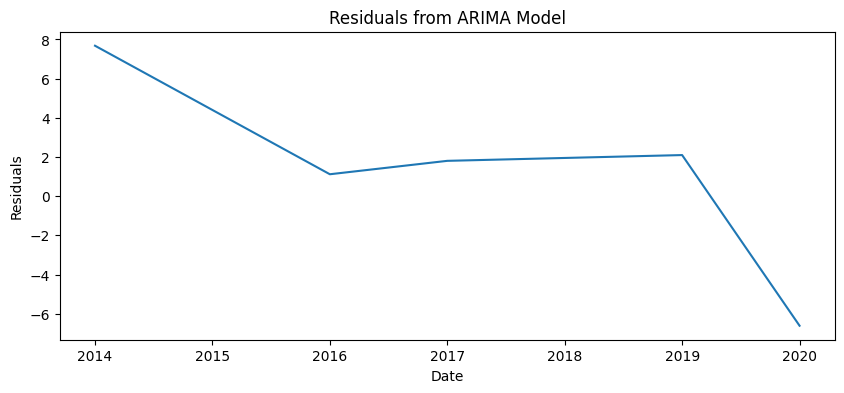

<Figure size 800x400 with 0 Axes>

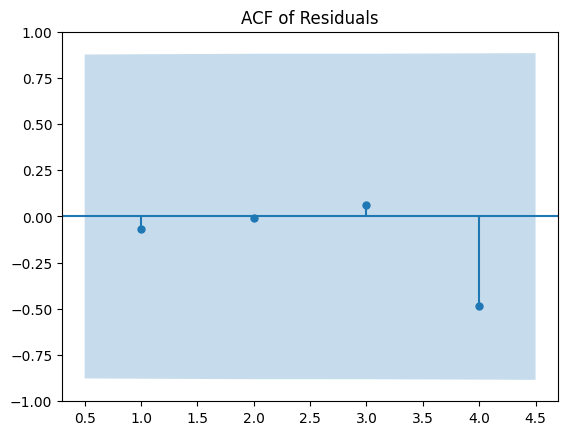

Ljung-Box test results:
    lb_stat  lb_pvalue
4  8.361868   0.079187
Forecast Data:
       Forecast
year          
2015  8.086251
2018  8.046108


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



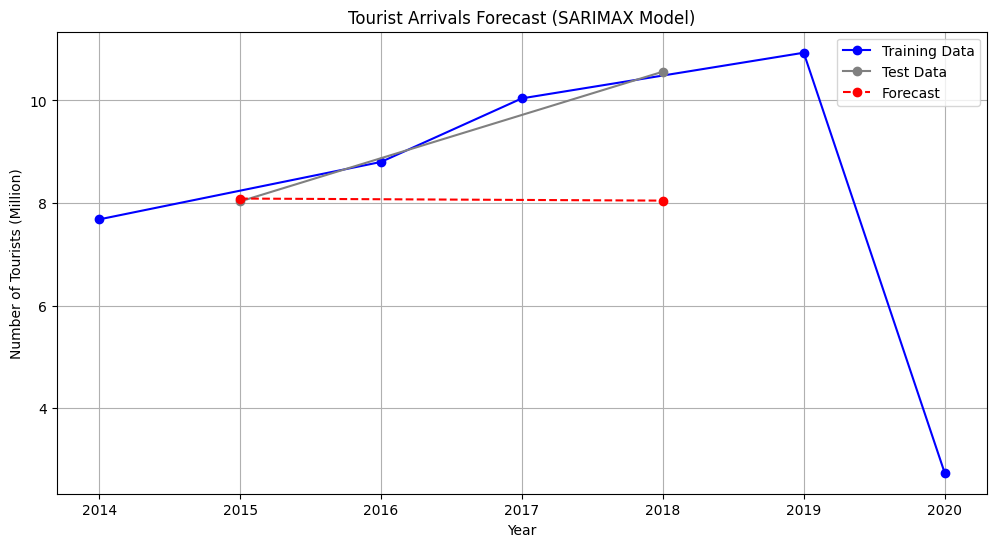

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load the dataset
df = pd.read_csv('General Data 2014-2020.csv')

# Set the year as the index
df.set_index('year', inplace=True)

# Select the column with foreign tourist arrivals
df = df[['noftaii']]  # Keeping only the relevant column

# ---------------------------
# Assume your preprocessed DataFrame is called df,
# with a DateTime index and a column 'noftaii' representing
# the number of foreign tourist arrivals (in million).
# For example:
# df = pd.read_csv('processed_data.csv', parse_dates=['date'], index_col='date')

# Split data into training and test sets (Now testing on 2017)
train = df.loc[(df.index != 2015) & (df.index != 2018)]  # Train on all years except 2015 and 2018
test = df.loc[(df.index == 2015) | (df.index == 2018)]  # Test on only 2015 and 2018

# ---------------------------
# OPTIONAL: Determine the best ARIMA order (p, d, q) by comparing BIC over a grid of parameters

p = d = q = range(0, 3)  # adjust ranges based on your EDA findings
pdq = list(itertools.product(p, d, q))

lowest_bic = np.inf
best_order = None
best_model = None

print("Searching for the best ARIMA model based on BIC...")
for order in pdq:
    try:
        model = ARIMA(train['noftaii'], order=order)
        model_fit = model.fit()
        bic = model_fit.bic
        if bic < lowest_bic:
            lowest_bic = bic
            best_order = order
            best_model = model_fit
    except Exception as e:
        # if model fails to converge, skip the order
        continue

print(f"Best ARIMA order found: {best_order} with BIC: {lowest_bic:.2f}")

# ---------------------------
# If you already have an order from your analysis, you can directly fit the model.
# For instance, using ARIMA(1,1,1):

order = (1, 1, 1)
model = ARIMA(train['noftaii'], order=order)
model_fit = model.fit()
print(model_fit.summary())

# ---------------------------
# Diagnostic Plots

# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot ACF of the residuals
# Reducing lags to be within the bounds of the data
plt.figure(figsize=(8, 4))
plot_acf(residuals, lags=len(residuals) - 1, zero=False)  # Changed lags to len(residuals) -1 to stay within range.
plt.title('ACF of Residuals')
plt.show()

# Perform the Ljung-Box test for autocorrelation
# Set lags to be less than or equal to the length of the residuals
lb_test = acorr_ljungbox(residuals, lags=[len(residuals) - 1], return_df=True)  # Changed lags to len(residuals) - 1 to stay within range
print("Ljung-Box test results:")
print(lb_test)

# ---------------------------
# Forecasting

# 🔹 Step 1: Ensure forecast index matches test index
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# 🔹 Step 2: Ensure forecast index matches test index
forecast.index = test.index

# 🔹 Step 3: Convert forecast to DataFrame for easy plotting
forecast_df = pd.DataFrame({'Forecast': forecast}, index=test.index)

# 🔹 Step 4: Debugging (Check forecast values before plotting)
print("Forecast Data:\n", forecast_df)

# 🔹 Step 5: Plot training data, test data, and forecasted values
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(train.index, train['noftaii'], label='Training Data', color='blue', marker='o')

# Plot Test Data
plt.plot(test.index, test['noftaii'], label='Test Data', color='gray', marker='o')

# Plot Forecasted Values
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red', linestyle='dashed', marker='o')

# 🔹 Step 6: Improve Visualization
plt.title('Tourist Arrivals Forecast (SARIMAX Model)')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (Million)')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

In [ ]:
# Ensure forecast has the same index as test data
forecast.index = test.index  # Assign test index to forecast

# Now align them properly
actual_values, forecast_values = test['noftaii'].align(forecast, join='inner')

# Compute MAPE only if valid values exist
if not actual_values.empty and (actual_values != 0).all():
    # Calculate MAE, MSE, and RMSE here before printing
    mae_actual = np.mean(np.abs(actual_values - forecast_values))
    mse_actual = np.mean((actual_values - forecast_values)**2)
    rmse_actual = np.sqrt(mse_actual)

    mape_actual = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
else:
    mae_actual = mse_actual = rmse_actual = np.nan  # Set errors as NaN if no valid data
    mape_actual = np.nan  # MAPE is NaN if division by zero happens

# Print results
print("Model Accuracy Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_actual:.2f} million")
print(f"  Mean Squared Error (MSE): {mse_actual:.2f} million²")
print(f"  Root Mean Squared Error (RMSE): {rmse_actual:.2f} million")
print(f"  Mean Absolute Percentage Error (MAPE): {mape_actual:.2f}%")

Model Accuracy Metrics:
  Mean Absolute Error (MAE): 1.29 million
  Mean Squared Error (MSE): 3.16 million²
  Root Mean Squared Error (RMSE): 1.78 million
  Mean Absolute Percentage Error (MAPE): 12.25%


In [ ]:
import pandas as pd

# Synthetic data: years and corresponding noftaii (in million)
# Values for 2000-2013 are generated to follow an upward trend,
# and for 2021-2024 to simulate a gradual recovery after the 2020 drop.
synthetic_data = {
    2000: 1.80,
    2001: 2.00,
    2002: 2.30,
    2003: 2.60,
    2004: 2.90,
    2005: 3.30,
    2006: 3.80,
    2007: 4.20,
    2008: 4.70,
    2009: 5.10,
    2010: 5.50,
    2011: 6.00,
    2012: 6.40,
    2013: 7.00,
    2014: 7.68,   # Original data starts here
    2015: 8.03,
    2016: 8.80,
    2017: 10.04,
    2018: 10.56,
    2019: 10.93,
    2020: 2.74,   # Outlier due to COVID-19 impact
    2021: 4.50,
    2022: 7.50,
    2023: 9.00,
    2024: 10.50
}

# Create a temporary DataFrame for synthetic modeling (without altering your original file)
synthetic_df = pd.DataFrame(list(synthetic_data.items()), columns=['year', 'noftaii'])
synthetic_df.set_index('year', inplace=True)
print("Synthetic Data Sample:")
print(synthetic_df)

Synthetic Data Sample:
      noftaii
year         
2000     1.80
2001     2.00
2002     2.30
2003     2.60
2004     2.90
2005     3.30
2006     3.80
2007     4.20
2008     4.70
2009     5.10
2010     5.50
2011     6.00
2012     6.40
2013     7.00
2014     7.68
2015     8.03
2016     8.80
2017    10.04
2018    10.56
2019    10.93
2020     2.74
2021     4.50
2022     7.50
2023     9.00
2024    10.50


Searching for the best ARIMA model based on BIC...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of inde

Best ARIMA order found: (0, 2, 2) with BIC: 87.58
                               SARIMAX Results                                
Dep. Variable:                noftaii   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -41.275
Date:                Thu, 06 Mar 2025   AIC                             88.550
Time:                        12:52:15   BIC                             91.384
Sample:                             0   HQIC                            89.030
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1536      0.917      0.167      0.867      -1.644       1.951
ma.L1         -0.5980      0.693     -0.863      0.388      -1.955       0.760
si

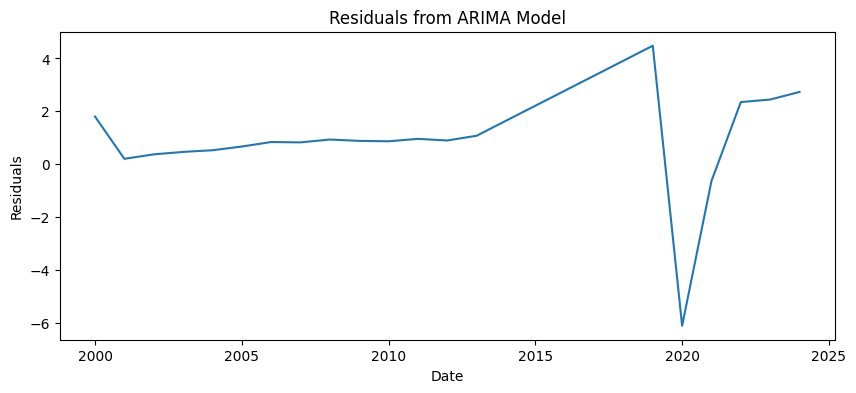

<Figure size 800x400 with 0 Axes>

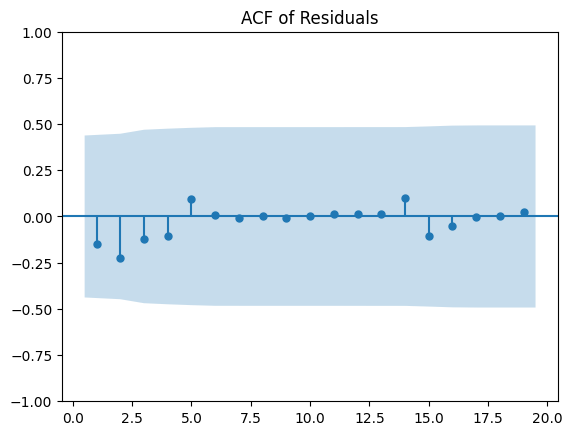

Ljung-Box test results:
    lb_stat  lb_pvalue
19  4.98267   0.999445
Forecast Data:
       Forecast
year          
2014  9.097663
2015  8.882270
2016  8.849187
2017  8.844106
2018  8.843325


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



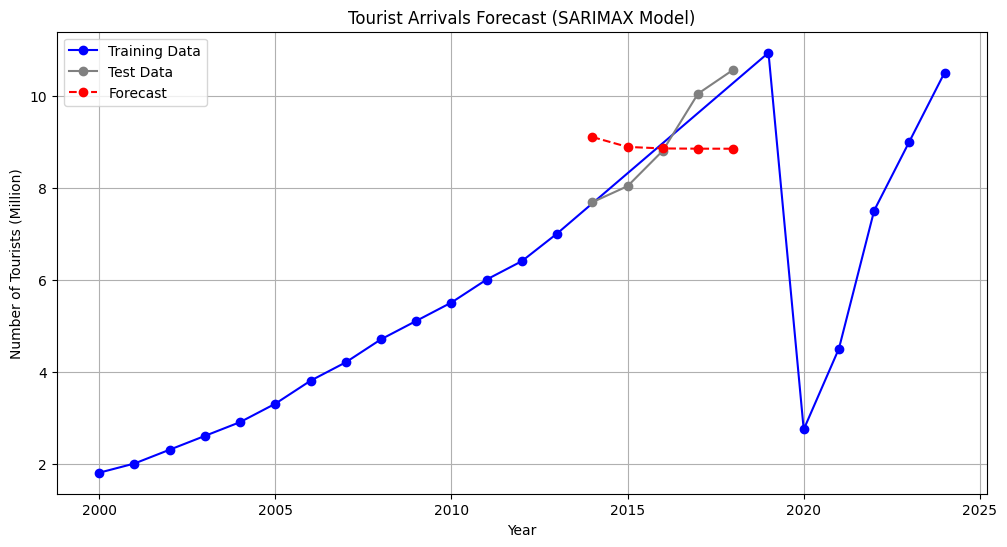

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load the dataset
df = synthetic_df.copy()

# Set the year as the index
#df.set_index('year', inplace=True)

# Select the column with foreign tourist arrivals
df = df[['noftaii']]  # Keeping only the relevant column

# ---------------------------
# Assume your preprocessed DataFrame is called df,
# with a DateTime index and a column 'noftaii' representing
# the number of foreign tourist arrivals (in million).
# For example:
# df = pd.read_csv('processed_data.csv', parse_dates=['date'], index_col='date')

# Split data into training and test sets (Now testing on 2017)
train = df.loc[(df.index != 2014) & (df.index != 2015) & (df.index != 2016) & (df.index != 2017) & (df.index != 2018)]  # Train on all years except 2015 and 2018
test = df.loc[(df.index == 2014) | (df.index == 2015) | (df.index == 2016) | (df.index == 2017) | (df.index == 2018)]  # Test on only 2015 and 2018

# ---------------------------
# OPTIONAL: Determine the best ARIMA order (p, d, q) by comparing BIC over a grid of parameters

p = d = q = range(0, 3)  # adjust ranges based on your EDA findings
pdq = list(itertools.product(p, d, q))

lowest_bic = np.inf
best_order = None
best_model = None

print("Searching for the best ARIMA model based on BIC...")
for order in pdq:
    try:
        model = ARIMA(train['noftaii'], order=order)
        model_fit = model.fit()
        bic = model_fit.bic
        if bic < lowest_bic:
            lowest_bic = bic
            best_order = order
            best_model = model_fit
    except Exception as e:
        # if model fails to converge, skip the order
        continue

print(f"Best ARIMA order found: {best_order} with BIC: {lowest_bic:.2f}")

# ---------------------------
# If you already have an order from your analysis, you can directly fit the model.
# For instance, using ARIMA(1,1,1):

order = (1, 1, 1)
model = ARIMA(train['noftaii'], order=order)
model_fit = model.fit()
print(model_fit.summary())

# ---------------------------
# Diagnostic Plots

# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot ACF of the residuals
# Reducing lags to be within the bounds of the data
plt.figure(figsize=(8, 4))
plot_acf(residuals, lags=len(residuals) - 1, zero=False)  # Changed lags to len(residuals) -1 to stay within range.
plt.title('ACF of Residuals')
plt.show()

# Perform the Ljung-Box test for autocorrelation
# Set lags to be less than or equal to the length of the residuals
lb_test = acorr_ljungbox(residuals, lags=[len(residuals) - 1], return_df=True)  # Changed lags to len(residuals) - 1 to stay within range
print("Ljung-Box test results:")
print(lb_test)

# ---------------------------
# 🔹 Step 1: Ensure forecast index matches test index
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# 🔹 Step 2: Ensure forecast index matches test index
forecast.index = test.index

# 🔹 Step 3: Convert forecast to DataFrame for easy plotting
forecast_df = pd.DataFrame({'Forecast': forecast}, index=test.index)

# 🔹 Step 4: Debugging (Check forecast values before plotting)
print("Forecast Data:\n", forecast_df)

# 🔹 Step 5: Plot training data, test data, and forecasted values
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(train.index, train['noftaii'], label='Training Data', color='blue', marker='o')

# Plot Test Data
plt.plot(test.index, test['noftaii'], label='Test Data', color='gray', marker='o')

# Plot Forecasted Values
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red', linestyle='dashed', marker='o')

# 🔹 Step 6: Improve Visualization
plt.title('Tourist Arrivals Forecast (SARIMAX Model)')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (Million)')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

# Ensure forecast has the same index as test data
forecast.index = test.index  # Assign correct year index

# Align actual and forecast values
actual_values, forecast_values = test['noftaii'].align(forecast, join='inner')

# Compute error metrics only if valid data exists
if not actual_values.empty and not forecast_values.empty and (actual_values != 0).all():
    mae_synthetic = mean_absolute_error(actual_values, forecast_values)
    mse_synthetic = mean_squared_error(actual_values, forecast_values)
    rmse_synthetic = sqrt(mse)
    mape_synthetic = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
else:
    mae_synthetic = mse_synthetic = rmse_synthetic = np.nan  # Set errors as NaN if no valid data
    mape_synthetic = np.nan  # MAPE is NaN if division by zero happens

# Print results
print("\n🔹 Model Accuracy Metrics with Synthetic Data:")
print(f"  Mean Absolute Error (MAE): {mae_synthetic:.2f} million")
print(f"  Mean Squared Error (MSE): {mse_synthetic:.2f} million²")
print(f"  Root Mean Squared Error (RMSE): {rmse_synthetic:.2f} million")
print(f"  Mean Absolute Percentage Error (MAPE): {mape_synthetic:.2f}%")


🔹 Model Accuracy Metrics with Synthetic Data:
  Mean Absolute Error (MAE): 1.05 million
  Mean Squared Error (MSE): 1.42 million²
  Root Mean Squared Error (RMSE): 1.19 million
  Mean Absolute Percentage Error (MAPE): 11.56%


In [ ]:
import pandas as pd

# Define a dictionary to store accuracy results
results_dict = {
    "Model": ["Actual Data", "Synthetic Data"],
    "MAE (million)": [mae_actual, mae_synthetic],
    "MSE (million²)": [mse_actual, mse_synthetic],
    "RMSE (million)": [rmse_actual, rmse_synthetic],
    "MAPE (%)": [mape_actual, mape_synthetic]
}

# Create a DataFrame for tabulation
results_df = pd.DataFrame(results_dict)

# Print the results in tabular form
print("\n🔹 Model Accuracy Comparison:")
print(results_df)

# Save the table as a LaTeX-friendly format for IEEE paper
latex_table = results_df.to_latex(index=False, caption="Comparison of Model Accuracy Metrics")

# Print LaTeX Table (Use this in your IEEE paper)
print("\n🔹 LaTeX Format for IEEE Paper:")
print(latex_table)


🔹 Model Accuracy Comparison:
            Model  MAE (million)  MSE (million²)  RMSE (million)   MAPE (%)
0     Actual Data       1.285071        3.161407        1.778035  12.253151
1  Synthetic Data       1.046338        1.423138        1.192953  11.559873

🔹 LaTeX Format for IEEE Paper:
\begin{table}
\caption{Comparison of Model Accuracy Metrics}
\begin{tabular}{lrrrr}
\toprule
Model & MAE (million) & MSE (million²) & RMSE (million) & MAPE (%) \\
\midrule
Actual Data & 1.285071 & 3.161407 & 1.778035 & 12.253151 \\
Synthetic Data & 1.046338 & 1.423138 & 1.192953 & 11.559873 \\
\bottomrule
\end{tabular}
\end{table}

